<h1 align="center"> Project 1 Web Scraping with API </h1>

---------

In [19]:
#import

import requests 
from datetime import datetime
import pytz
import csv
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt
import folium

%matplotlib inline

## Website API doc

https://darksky.net/dev/docs

In [4]:
#weclouddata location

latitude = '43.670'

longitude = '-79.390'

spot = folium.Map(
    location=[43.670, -79.390],
    zoom_start=11
)
folium.Marker([latitude, longitude]).add_to(spot)

#API secret key,timestamp 

key = 'ea5c302864c8a86ca449159198bdb7ea'

date = '2009-01-01'

time = int(datetime.strptime(date,'%Y-%m-%d').timestamp())

#sometimes API data is incomplete, we have to give csv the columns

csv_columns = ['time', 'summary', 'icon', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensity', 'precipIntensityMax', 'precipIntensityMaxTime', 'precipProbability', 'precipAccumulation', 'precipType', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'humidity', 'pressure', 'windSpeed', 'windGust', 'windGustTime', 'windBearing', 'cloudCover', 'uvIndex', 'uvIndexTime', 'visibility', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 
                   'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']

spot

In [63]:
#get data from Dark Sky API

for i in range(1,3895): #free API daily limit is 1000, adjust the loop range accordingly 
    
    url = f'https://api.darksky.net/forecast/{key}/{latitude},{longitude},{time}?exclude=hourly/'
    
    r = requests.get(url)
    
    j = json.loads(r.text)
    
#write data into csv file    
    try:
    
        d = j['daily']['data'][0]
    except:
        
        d = j['currently']
        
    with open(r'D:\mypython\Weclouddata\Project 1\Toronto_weather.csv', 'a',encoding='utf-8') as f:
        w = csv.DictWriter(f,fieldnames=csv_columns,extrasaction='ignore')
        if i==1:
            w.writeheader()
        else:
            pass
        w.writerow(d)
        
    time += 86400

In [2]:
#read csv file in pandas

df = pd.read_csv(r'D:\mypython\Weclouddata\Project 1\Toronto_weather.csv')
df.tail()

,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,...,uvIndexTime,visibility,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
3889,1566705600,Partly cloudy throughout the day.,partly-cloudy-day,1.566729e+09,1.566778e+09,0.83,0.0006,0.0017,1.566770e+09,0.06,...,1.566756e+09,9.208,60.13,1.566731e+09,72.80,1.566763e+09,60.31,1.566731e+09,72.80,1.566763e+09
3890,1566792000,Clear throughout the day.,clear-day,1.566816e+09,1.566864e+09,0.87,0.0005,0.0017,1.566810e+09,0.08,...,1.566839e+09,9.105,64.80,1.566810e+09,73.93,1.566846e+09,64.90,1.566814e+09,73.93,1.566846e+09
3891,1566878400,Rain in the morning and afternoon.,rain,1.566902e+09,1.566951e+09,0.91,0.0364,0.3188,1.566936e+09,1.00,...,1.566925e+09,8.619,65.66,1.566907e+09,71.48,1.566961e+09,66.37,1.566907e+09,72.55,1.566961e+09
3892,1566964800,Mostly cloudy throughout the day.,partly-cloudy-day,1.566989e+09,1.567037e+09,0.94,0.0031,0.0408,1.566965e+09,0.28,...,1.567012e+09,9.311,65.83,1.566990e+09,78.75,1.567026e+09,66.69,1.566990e+09,78.75,1.567026e+09
3893,1567051200,Possible light rain overnight.,partly-cloudy-day,1.567075e+09,1.567123e+09,0.98,0.0005,0.0025,1.567069e+09,0.14,...,1.567102e+09,9.541,61.96,1.567076e+09,75.83,1.567112e+09,61.96,1.567076e+09,75.83,1.567112e+09


In [5]:
#get all the columns use timestamp

l=[]
for i in csv_columns:
    if 'ime' in i:
        l.append(i)
    else:
        pass
print(l)

['time', 'sunriseTime', 'sunsetTime', 'precipIntensityMaxTime', 'temperatureHighTime', 'temperatureLowTime', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'windGustTime', 'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime']


In [6]:
#change all the timestamp to datetime

for i in l:
    df[i] = pd.to_datetime(df[i], unit='s')

df.tail()

,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,...,uvIndexTime,visibility,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
3889,2019-08-25 04:00:00,Partly cloudy throughout the day.,partly-cloudy-day,2019-08-25 10:34:50,2019-08-26 00:07:30,0.83,0.0006,0.0017,2019-08-25 22:00:00,0.06,...,2019-08-25 18:00:00,9.208,60.13,2019-08-25 11:00:00,72.80,2019-08-25 20:00:00,60.31,2019-08-25 11:00:00,72.80,2019-08-25 20:00:00
3890,2019-08-26 04:00:00,Clear throughout the day.,clear-day,2019-08-26 10:35:57,2019-08-27 00:05:50,0.87,0.0005,0.0017,2019-08-26 09:00:00,0.08,...,2019-08-26 17:00:00,9.105,64.80,2019-08-26 09:00:00,73.93,2019-08-26 19:00:00,64.90,2019-08-26 10:00:00,73.93,2019-08-26 19:00:00
3891,2019-08-27 04:00:00,Rain in the morning and afternoon.,rain,2019-08-27 10:37:05,2019-08-28 00:04:08,0.91,0.0364,0.3188,2019-08-27 20:00:00,1.00,...,2019-08-27 17:00:00,8.619,65.66,2019-08-27 12:00:00,71.48,2019-08-28 03:00:00,66.37,2019-08-27 12:00:00,72.55,2019-08-28 03:00:00
3892,2019-08-28 04:00:00,Mostly cloudy throughout the day.,partly-cloudy-day,2019-08-28 10:38:12,2019-08-29 00:02:26,0.94,0.0031,0.0408,2019-08-28 04:00:00,0.28,...,2019-08-28 17:00:00,9.311,65.83,2019-08-28 11:00:00,78.75,2019-08-28 21:00:00,66.69,2019-08-28 11:00:00,78.75,2019-08-28 21:00:00
3893,2019-08-29 04:00:00,Possible light rain overnight.,partly-cloudy-day,2019-08-29 10:39:19,2019-08-30 00:00:43,0.98,0.0005,0.0025,2019-08-29 09:00:00,0.14,...,2019-08-29 18:00:00,9.541,61.96,2019-08-29 11:00:00,75.83,2019-08-29 21:00:00,61.96,2019-08-29 11:00:00,75.83,2019-08-29 21:00:00


In [7]:
#add year and month

df['year']=df['time'].dt.year
df['month']=df['time'].dt.month
df.tail()

,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,year,month
3889,2019-08-25 04:00:00,Partly cloudy throughout the day.,partly-cloudy-day,2019-08-25 10:34:50,2019-08-26 00:07:30,0.83,0.0006,0.0017,2019-08-25 22:00:00,0.06,...,60.13,2019-08-25 11:00:00,72.80,2019-08-25 20:00:00,60.31,2019-08-25 11:00:00,72.80,2019-08-25 20:00:00,2019,8
3890,2019-08-26 04:00:00,Clear throughout the day.,clear-day,2019-08-26 10:35:57,2019-08-27 00:05:50,0.87,0.0005,0.0017,2019-08-26 09:00:00,0.08,...,64.80,2019-08-26 09:00:00,73.93,2019-08-26 19:00:00,64.90,2019-08-26 10:00:00,73.93,2019-08-26 19:00:00,2019,8
3891,2019-08-27 04:00:00,Rain in the morning and afternoon.,rain,2019-08-27 10:37:05,2019-08-28 00:04:08,0.91,0.0364,0.3188,2019-08-27 20:00:00,1.00,...,65.66,2019-08-27 12:00:00,71.48,2019-08-28 03:00:00,66.37,2019-08-27 12:00:00,72.55,2019-08-28 03:00:00,2019,8
3892,2019-08-28 04:00:00,Mostly cloudy throughout the day.,partly-cloudy-day,2019-08-28 10:38:12,2019-08-29 00:02:26,0.94,0.0031,0.0408,2019-08-28 04:00:00,0.28,...,65.83,2019-08-28 11:00:00,78.75,2019-08-28 21:00:00,66.69,2019-08-28 11:00:00,78.75,2019-08-28 21:00:00,2019,8
3893,2019-08-29 04:00:00,Possible light rain overnight.,partly-cloudy-day,2019-08-29 10:39:19,2019-08-30 00:00:43,0.98,0.0005,0.0025,2019-08-29 09:00:00,0.14,...,61.96,2019-08-29 11:00:00,75.83,2019-08-29 21:00:00,61.96,2019-08-29 11:00:00,75.83,2019-08-29 21:00:00,2019,8


In [8]:
#change datetime to date

df['time'] = df['time'].dt.date
df.head()

,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,year,month
0,2009-01-01,Mostly cloudy throughout the day.,partly-cloudy-day,2009-01-01 12:52:25,2009-01-01 21:52:35,0.17,0.0,0.0,NaT,0.0,...,6.33,2009-01-01 12:00:00,25.26,2009-01-02 04:00:00,6.33,2009-01-01 12:00:00,20.20,2009-01-01 18:00:00,2009,1
1,2009-01-02,Foggy in the evening.,partly-cloudy-day,2009-01-02 12:52:26,2009-01-02 21:53:29,0.20,0.0,0.0,NaT,0.0,...,25.99,2009-01-02 05:00:00,34.10,2009-01-02 18:00:00,18.94,2009-01-03 03:00:00,28.85,2009-01-02 16:00:00,2009,1
2,2009-01-03,Partly cloudy throughout the day.,partly-cloudy-day,2009-01-03 12:52:25,2009-01-03 21:54:24,0.24,0.0,0.0,NaT,0.0,...,15.21,2009-01-04 04:00:00,28.62,2009-01-03 09:00:00,10.54,2009-01-04 03:00:00,25.96,2009-01-03 07:00:00,2009,1
3,2009-01-04,Mostly cloudy throughout the day.,partly-cloudy-day,2009-01-04 12:52:21,2009-01-04 21:55:21,0.27,0.0,0.0,NaT,0.0,...,12.74,2009-01-04 09:00:00,28.59,2009-01-04 21:00:00,5.11,2009-01-04 11:00:00,27.72,2009-01-05 04:00:00,2009,1
4,2009-01-05,Partly cloudy throughout the day.,partly-cloudy-day,2009-01-05 12:52:14,2009-01-05 21:56:20,0.31,0.0,0.0,NaT,0.0,...,19.64,2009-01-06 04:00:00,33.42,2009-01-05 09:00:00,13.53,2009-01-06 04:00:00,30.46,2009-01-05 06:00:00,2009,1


In [9]:
# rename time to date

df.rename(columns={'time':'date'}, inplace=True)
df.tail()

,date,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,year,month
3889,2019-08-25,Partly cloudy throughout the day.,partly-cloudy-day,2019-08-25 10:34:50,2019-08-26 00:07:30,0.83,0.0006,0.0017,2019-08-25 22:00:00,0.06,...,60.13,2019-08-25 11:00:00,72.80,2019-08-25 20:00:00,60.31,2019-08-25 11:00:00,72.80,2019-08-25 20:00:00,2019,8
3890,2019-08-26,Clear throughout the day.,clear-day,2019-08-26 10:35:57,2019-08-27 00:05:50,0.87,0.0005,0.0017,2019-08-26 09:00:00,0.08,...,64.80,2019-08-26 09:00:00,73.93,2019-08-26 19:00:00,64.90,2019-08-26 10:00:00,73.93,2019-08-26 19:00:00,2019,8
3891,2019-08-27,Rain in the morning and afternoon.,rain,2019-08-27 10:37:05,2019-08-28 00:04:08,0.91,0.0364,0.3188,2019-08-27 20:00:00,1.00,...,65.66,2019-08-27 12:00:00,71.48,2019-08-28 03:00:00,66.37,2019-08-27 12:00:00,72.55,2019-08-28 03:00:00,2019,8
3892,2019-08-28,Mostly cloudy throughout the day.,partly-cloudy-day,2019-08-28 10:38:12,2019-08-29 00:02:26,0.94,0.0031,0.0408,2019-08-28 04:00:00,0.28,...,65.83,2019-08-28 11:00:00,78.75,2019-08-28 21:00:00,66.69,2019-08-28 11:00:00,78.75,2019-08-28 21:00:00,2019,8
3893,2019-08-29,Possible light rain overnight.,partly-cloudy-day,2019-08-29 10:39:19,2019-08-30 00:00:43,0.98,0.0005,0.0025,2019-08-29 09:00:00,0.14,...,61.96,2019-08-29 11:00:00,75.83,2019-08-29 21:00:00,61.96,2019-08-29 11:00:00,75.83,2019-08-29 21:00:00,2019,8


In [10]:
#change datetime to local time

for i in l[1:]:
    try:
        df[i]=df[i].dt.tz_localize(tz=pytz.timezone('Canada/Eastern'))
    except:
        pass
df.tail()

,date,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,year,month
3889,2019-08-25,Partly cloudy throughout the day.,partly-cloudy-day,2019-08-25 10:34:50-04:00,2019-08-26 00:07:30-04:00,0.83,0.0006,0.0017,2019-08-25 22:00:00,0.06,...,60.13,2019-08-25 11:00:00,72.80,2019-08-25 20:00:00-04:00,60.31,2019-08-25 11:00:00,72.80,2019-08-25 20:00:00-04:00,2019,8
3890,2019-08-26,Clear throughout the day.,clear-day,2019-08-26 10:35:57-04:00,2019-08-27 00:05:50-04:00,0.87,0.0005,0.0017,2019-08-26 09:00:00,0.08,...,64.80,2019-08-26 09:00:00,73.93,2019-08-26 19:00:00-04:00,64.90,2019-08-26 10:00:00,73.93,2019-08-26 19:00:00-04:00,2019,8
3891,2019-08-27,Rain in the morning and afternoon.,rain,2019-08-27 10:37:05-04:00,2019-08-28 00:04:08-04:00,0.91,0.0364,0.3188,2019-08-27 20:00:00,1.00,...,65.66,2019-08-27 12:00:00,71.48,2019-08-28 03:00:00-04:00,66.37,2019-08-27 12:00:00,72.55,2019-08-28 03:00:00-04:00,2019,8
3892,2019-08-28,Mostly cloudy throughout the day.,partly-cloudy-day,2019-08-28 10:38:12-04:00,2019-08-29 00:02:26-04:00,0.94,0.0031,0.0408,2019-08-28 04:00:00,0.28,...,65.83,2019-08-28 11:00:00,78.75,2019-08-28 21:00:00-04:00,66.69,2019-08-28 11:00:00,78.75,2019-08-28 21:00:00-04:00,2019,8
3893,2019-08-29,Possible light rain overnight.,partly-cloudy-day,2019-08-29 10:39:19-04:00,2019-08-30 00:00:43-04:00,0.98,0.0005,0.0025,2019-08-29 09:00:00,0.14,...,61.96,2019-08-29 11:00:00,75.83,2019-08-29 21:00:00-04:00,61.96,2019-08-29 11:00:00,75.83,2019-08-29 21:00:00-04:00,2019,8


In [364]:
df.describe(include='all')

,date,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,year,month
count,3894,3894,3894,3893,3893,3893.000000,3795.000000,3795.000000,1865,3795.000000,...,3893.000000,3893,3893.000000,3893,3893.000000,3893,3893.000000,3893,3894.000000,3894.000000
unique,3887,148,8,3886,3886,NaN,NaN,NaN,1861,NaN,...,NaN,3886,NaN,3886,NaN,3886,NaN,3886,NaN,NaN
top,2018-11-04,Partly cloudy throughout the day.,partly-cloudy-day,2011-11-06 12:01:05-05:00,2015-11-01 22:10:14-05:00,NaN,NaN,NaN,2018-11-04 17:00:00,NaN,...,NaN,2016-11-07 04:00:00,NaN,2016-11-06 19:00:00-05:00,NaN,2011-11-06 09:00:00,NaN,2015-11-01 20:00:00-05:00,NaN,NaN
freq,2,994,2085,2,2,NaN,NaN,NaN,2,NaN,...,NaN,2,NaN,2,NaN,2,NaN,2,NaN,NaN
first,NaN,NaN,NaN,2009-01-01 12:52:25-05:00,2009-01-01 21:52:35-05:00,NaN,NaN,NaN,2009-01-07 15:00:00,NaN,...,NaN,2009-01-01 12:00:00,NaN,2009-01-02 04:00:00-05:00,NaN,2009-01-01 12:00:00,NaN,2009-01-01 18:00:00-05:00,NaN,NaN
last,NaN,NaN,NaN,2019-08-29 10:39:19-04:00,2019-08-30 00:00:43-04:00,NaN,NaN,NaN,2019-08-29 09:00:00,NaN,...,NaN,2019-08-29 11:00:00,NaN,2019-08-29 21:00:00-04:00,NaN,2019-08-29 11:00:00,NaN,2019-08-29 21:00:00-04:00,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.500863,0.003283,0.021993,NaN,0.296930,...,42.387144,NaN,55.953509,NaN,39.483188,NaN,54.736157,NaN,2013.839753,6.411659
std,NaN,NaN,NaN,NaN,NaN,0.288016,0.010499,0.059648,NaN,0.392514,...,18.290738,NaN,20.040761,NaN,21.416881,NaN,22.410235,NaN,3.081144,3.425967
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,...,-13.170000,NaN,-1.730000,NaN,-34.780000,NaN,-18.690000,NaN,2009.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,0.250000,0.000000,0.000000,NaN,0.000000,...,29.630000,NaN,39.120000,NaN,24.540000,NaN,36.330000,NaN,2011.000000,3.000000


In [11]:
df.drop(df[df['date'].duplicated(keep='last')].index,inplace=True)

In [12]:
df.describe(include='all')

,date,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,year,month
count,3887,3887,3887,3886,3886,3886.000000,3788.000000,3788.000000,1861,3788.000000,...,3886.000000,3886,3886.000000,3886,3886.000000,3886,3886.000000,3886,3887.000000,3887.000000
unique,3887,148,8,3886,3886,NaN,NaN,NaN,1861,NaN,...,NaN,3886,NaN,3886,NaN,3886,NaN,3886,NaN,NaN
top,2014-11-28,Partly cloudy throughout the day.,partly-cloudy-day,2014-10-24 11:44:24-04:00,2019-05-10 00:30:02-04:00,NaN,NaN,NaN,2010-09-21 13:00:00,NaN,...,NaN,2010-07-31 10:00:00,NaN,2012-06-07 21:00:00-04:00,NaN,2010-07-31 10:00:00,NaN,2012-06-07 21:00:00-04:00,NaN,NaN
freq,1,990,2081,1,1,NaN,NaN,NaN,1,NaN,...,NaN,1,NaN,1,NaN,1,NaN,1,NaN,NaN
first,NaN,NaN,NaN,2009-01-01 12:52:25-05:00,2009-01-01 21:52:35-05:00,NaN,NaN,NaN,2009-01-07 15:00:00,NaN,...,NaN,2009-01-01 12:00:00,NaN,2009-01-02 04:00:00-05:00,NaN,2009-01-01 12:00:00,NaN,2009-01-01 18:00:00-05:00,NaN,NaN
last,NaN,NaN,NaN,2019-08-29 10:39:19-04:00,2019-08-30 00:00:43-04:00,NaN,NaN,NaN,2019-08-29 09:00:00,NaN,...,NaN,2019-08-29 11:00:00,NaN,2019-08-29 21:00:00-04:00,NaN,2019-08-29 11:00:00,NaN,2019-08-29 21:00:00-04:00,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.500919,0.003287,0.022017,NaN,0.296903,...,42.399460,NaN,55.967918,NaN,39.496086,NaN,54.751796,NaN,2013.839208,6.403396
std,NaN,NaN,NaN,NaN,NaN,0.288014,0.010508,0.059695,NaN,0.392465,...,18.303132,NaN,20.053010,NaN,21.431467,NaN,22.423798,NaN,3.082437,3.423507
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,...,-13.170000,NaN,-1.730000,NaN,-34.780000,NaN,-18.690000,NaN,2009.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,0.250000,0.000000,0.000000,NaN,0.000000,...,29.612500,NaN,39.125000,NaN,24.547500,NaN,36.330000,NaN,2011.000000,3.000000


In [13]:
df.set_index('date',inplace=True)
df.tail()

,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,precipAccumulation,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,year,month
date,,,,,,,,,,,,,,,,,,,,,
2019-08-25,Partly cloudy throughout the day.,partly-cloudy-day,2019-08-25 10:34:50-04:00,2019-08-26 00:07:30-04:00,0.83,0.0006,0.0017,2019-08-25 22:00:00,0.06,NaN,...,60.13,2019-08-25 11:00:00,72.80,2019-08-25 20:00:00-04:00,60.31,2019-08-25 11:00:00,72.80,2019-08-25 20:00:00-04:00,2019,8
2019-08-26,Clear throughout the day.,clear-day,2019-08-26 10:35:57-04:00,2019-08-27 00:05:50-04:00,0.87,0.0005,0.0017,2019-08-26 09:00:00,0.08,NaN,...,64.80,2019-08-26 09:00:00,73.93,2019-08-26 19:00:00-04:00,64.90,2019-08-26 10:00:00,73.93,2019-08-26 19:00:00-04:00,2019,8
2019-08-27,Rain in the morning and afternoon.,rain,2019-08-27 10:37:05-04:00,2019-08-28 00:04:08-04:00,0.91,0.0364,0.3188,2019-08-27 20:00:00,1.00,NaN,...,65.66,2019-08-27 12:00:00,71.48,2019-08-28 03:00:00-04:00,66.37,2019-08-27 12:00:00,72.55,2019-08-28 03:00:00-04:00,2019,8
2019-08-28,Mostly cloudy throughout the day.,partly-cloudy-day,2019-08-28 10:38:12-04:00,2019-08-29 00:02:26-04:00,0.94,0.0031,0.0408,2019-08-28 04:00:00,0.28,NaN,...,65.83,2019-08-28 11:00:00,78.75,2019-08-28 21:00:00-04:00,66.69,2019-08-28 11:00:00,78.75,2019-08-28 21:00:00-04:00,2019,8
2019-08-29,Possible light rain overnight.,partly-cloudy-day,2019-08-29 10:39:19-04:00,2019-08-30 00:00:43-04:00,0.98,0.0005,0.0025,2019-08-29 09:00:00,0.14,NaN,...,61.96,2019-08-29 11:00:00,75.83,2019-08-29 21:00:00-04:00,61.96,2019-08-29 11:00:00,75.83,2019-08-29 21:00:00-04:00,2019,8


In [14]:
#change missing preciptype to no precip

df['precipType'] = df['precipType'].fillna('no precip')

In [15]:
df.groupby('precipType')['temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow', 'dewPoint', 'humidity', 'pressure', 'windSpeed', 'windGust', 'cloudCover', 'uvIndex',  'visibility', 'temperatureMin',  'temperatureMax', 
                   'apparentTemperatureMin', 'apparentTemperatureMax'].mean()

,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,humidity,pressure,windSpeed,windGust,cloudCover,uvIndex,visibility,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
precipType,,,,,,,,,,,,,,,,
no precip,55.327047,42.731769,53.702111,40.384812,36.522915,0.653809,1018.431583,4.550632,13.977739,0.518188,4.464099,9.736137,40.881446,55.706562,38.236286,54.359886
rain,61.103690,48.758172,60.560413,46.589560,47.199053,0.758870,1012.615014,5.689283,17.967105,0.748038,4.230041,8.985714,49.166933,61.634001,47.051652,61.338416
sleet,36.070000,27.070000,29.750588,18.560000,24.796471,0.745294,1015.652353,8.481765,23.307059,0.861765,2.941176,8.293059,26.242941,37.996471,18.862941,33.640000
snow,28.943737,20.271246,23.197716,12.368616,17.639031,0.738028,1016.866851,7.025433,20.099827,0.787716,1.923875,7.978156,19.809446,29.969100,11.262699,25.183114


In [16]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [20, 8]

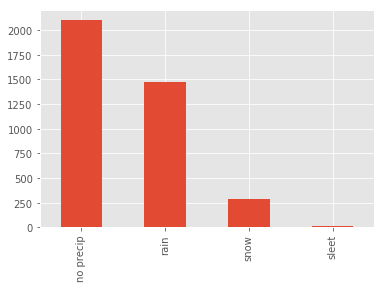

In [371]:
df['precipType'].value_counts().plot(kind='bar')

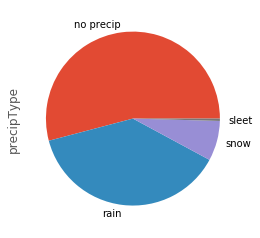

In [372]:
df['precipType'].value_counts().plot(kind='pie')

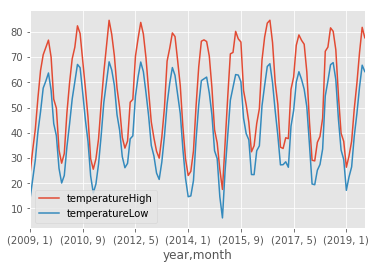

In [373]:
df.groupby(['year','month'])[['temperatureHigh', 'temperatureLow']].mean().plot(kind='line')

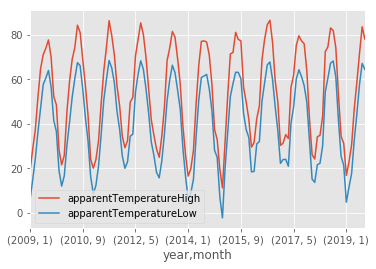

In [374]:
df.groupby(['year','month'])[['apparentTemperatureHigh','apparentTemperatureLow']].mean().plot(kind='line')

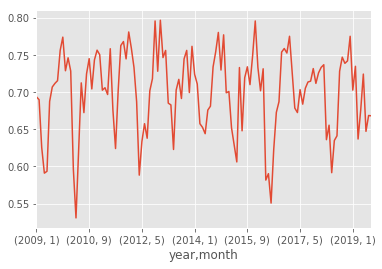

In [375]:
df.groupby(['year','month'])['humidity'].mean().plot(kind='line')

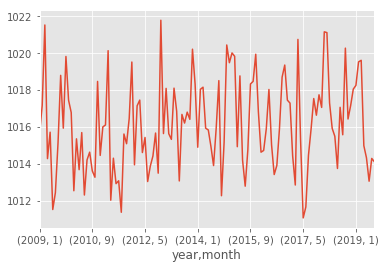

In [376]:
df.groupby(['year','month'])['pressure'].mean().plot(kind='line')

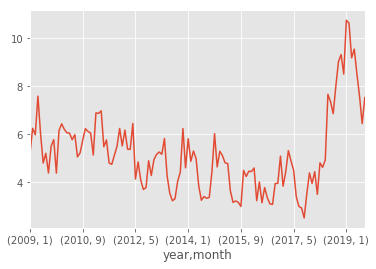

In [377]:
df.groupby(['year','month'])['windSpeed'].mean().plot(kind='line')

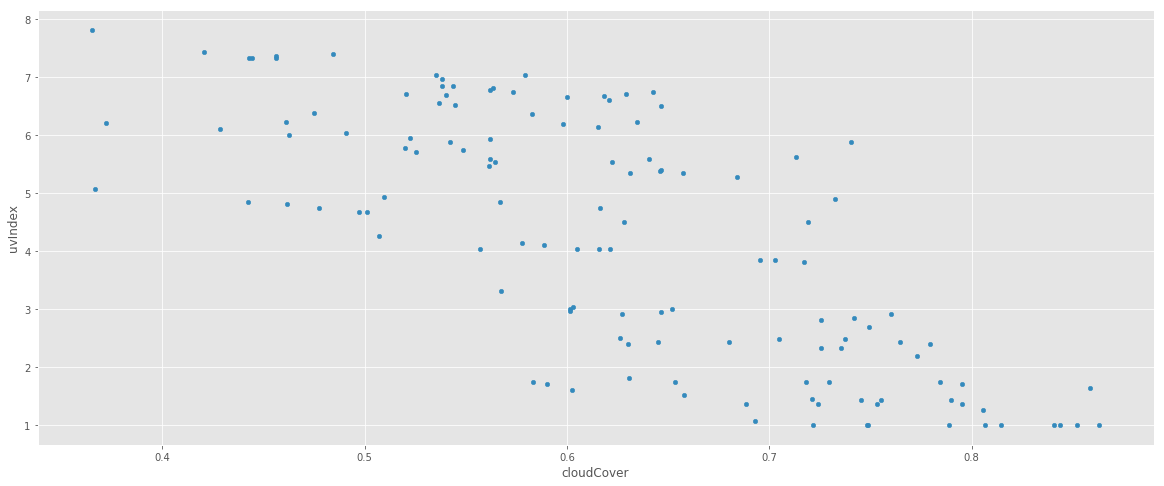

In [18]:

df1=df.groupby(['year','month']).mean()
df1[['cloudCover','uvIndex']].plot(x='cloudCover', y='uvIndex', kind='scatter')